## case study: sites that fully allow and mention AI-related bots/
## corresponds to Figure 4 in the paper

In [1]:
import json
import pandas as pd

In [2]:
user_agents = [
    "Amazonbot",
    "AI2Bot",
    "anthropic-ai",
    "Applebot",
    "Applebot-Extended",
    "Bytespider",
    "CCBot",
    "ChatGPT-User",
    "Claude-Web",
    "ClaudeBot",
    "cohere-ai",
    "Diffbot",
    "FacebookBot",
    "Google-Extended",
    "GPTBot",
    "Kangaroo Bot",
    "Meta-ExternalAgent",
    "Meta-ExternalFetcher",
    "OAI-SearchBot",
    "omgili",
    "PerplexityBot",
    "Timpibot",
    "Webzio-Extended",
    "YouBot"
]

In [3]:
with open("../partition2filenames.json") as f:
    partition2filenames = json.load(f)

In [4]:
snapshots = sorted(list(partition2filenames.keys()))

In [5]:
with open("fully_allow_mentioned_results_by_ua.json") as f:
    results = json.load(f)

In [6]:
counts_by_ua = {}
for snapshot in snapshots:
    counts_by_ua[snapshot] = {}
    for ua in user_agents:
        counts_by_ua[snapshot][ua] = len(results[ua][snapshot])

In [7]:
df = pd.DataFrame(counts_by_ua)

In [8]:
agg = {}
for snapshot in snapshots:
    for ua in user_agents:
        if snapshot not in agg:
            agg[snapshot] = 0
        agg[snapshot] += len(results[ua][snapshot])

In [9]:
removed = {
'2022-05': 0,
'2022-21': 5,
 '2022-40': 6,
 '2023-06': 6,
 '2023-14': 4,
 '2023-23': 11,
 '2023-40': 22,
 '2023-50': 93,
 '2024-10': 116,
 '2024-18': 123,
 '2024-22': 182,
 '2024-26': 84,
 '2024-33': 246,
 '2024-38': 256,
 '2024-42': 199}

In [10]:
df = pd.DataFrame(removed, index=[0]).T

In [11]:
df['cumsum'] = df[0].cumsum()

In [12]:
dates_have = ['Oct 2022',
 'Dec 2022',
 'Feb 2023',
 'Apr 2023',
 'Jun 2023',
 'Oct 2023',
 'Dec 2023',
 'Mar 2024',
 'Apr 2024',
 'May 2024',
 'Jun 2024',
 'Jul 2024',
 'Aug 2024',
 'Sep 2024',
 'Oct 2024']

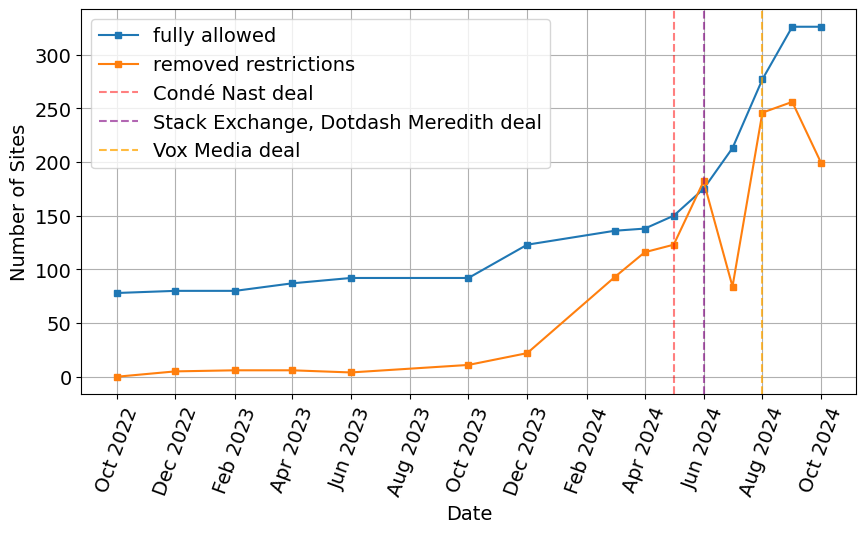

In [ ]:
import matplotlib.pyplot as plt
from datetime import datetime
import matplotlib.dates as mdates


plt.figure(figsize=(10, 5))
plt.plot([datetime.strptime(key, "%b %Y") for key in dates_have], agg.values(), label='fully allowed', marker='s', markersize=4)
plt.plot([datetime.strptime(key, "%b %Y") for key in dates_have], removed.values(), label='removed restrictions', marker='s', markersize=4)


plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=2))



FONTSIZE = 14
plt.xticks(rotation=70, fontsize=FONTSIZE)
plt.yticks(fontsize=FONTSIZE)
plt.legend(prop={'size': FONTSIZE})
plt.ylabel("Number of Sites", fontsize=FONTSIZE)
plt.xlabel("Date", fontsize=FONTSIZE)

plt.axvline(x=datetime.strptime('May 2024', "%b %Y"), linestyle='--', color='red', alpha=0.5, label='Condé Nast deal') # may 2024
plt.axvline(x=datetime.strptime('Jun 2024', "%b %Y"), linestyle='--', color='purple', alpha=0.6, label='Stack Exchange, Dotdash Meredith deal') # jun 2024
plt.axvline(x=datetime.strptime('Aug 2024', "%b %Y"), linestyle='--', color='orange', alpha=0.75, label='Vox Media deal') # aug 2024
plt.legend(prop={'size': FONTSIZE})
plt.grid()
# plt.savefig("allow_and_remove-CAMERAREADY.pdf", bbox_inches='tight')

plt.show()
